<a href="https://colab.research.google.com/github/sakethnandam/practice/blob/main/firstAutoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers import Layer, Dense, Dropout, Activation, Flatten, Reshape, Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras import regularizers
from keras.regularizers import l2
from keras.utils import to_categorical

In [ ]:
(X_train, _),(X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

print('X_train shape:', X_train.shape)
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')


X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))


In [ ]:
input_size = 784
hidden_size = 64
output_size = 784


In [ ]:
x = Input(shape=(input_size,))
h = Dense(hidden_size,activation='relu')(x)
r = Dense(output_size,activation='sigmoid')(h)

autoencoder = Model(inputs=x,outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')


In [ ]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,X_test))


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0745 - val_loss: 0.0221
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0196 - val_loss: 0.0128
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0119 - val_loss: 0.0087
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0083 - val_loss: 0.0066
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0064 - val_loss: 0.0055


In [ ]:
decoded_imgs = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

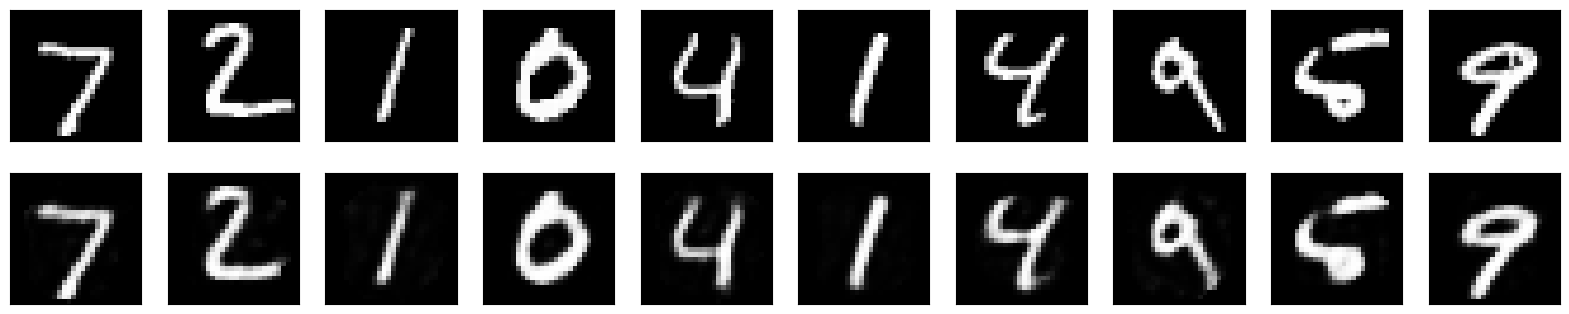

In [ ]:
n=10
plt.figure(figsize=(20,6))
for i in range(n):
  #the input
  ax = plt.subplot(3,n,i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #the reconstruction
  ax = plt.subplot(3, n, i+n+1)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show

dict_keys(['loss', 'val_loss'])


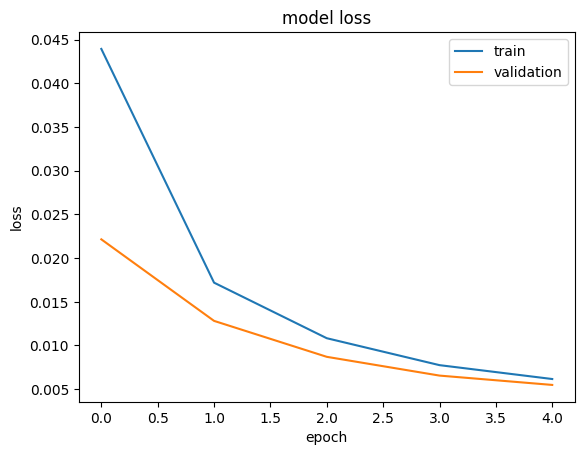

In [ ]:
print(history.history.keys())

#plotting the model loss over epochs (see how it gets more accurate)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()